In [ ]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection,imshow_collection
from skimage import color, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl, ProjectiveTransform
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.path import Path
from scipy.ndimage import affine_transform, zoom
from scipy import misc

(224, 225, 3)


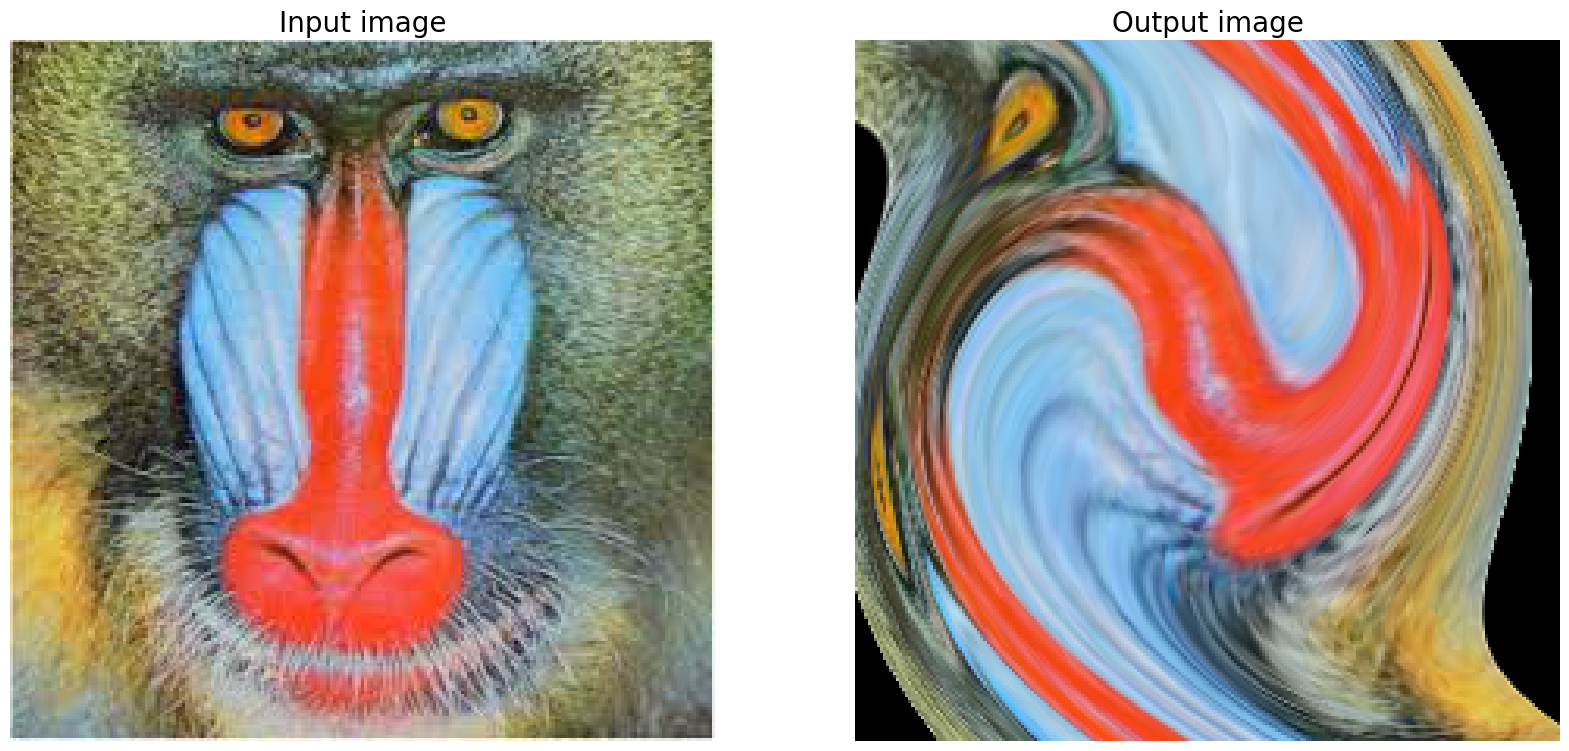

In [3]:
def swirl(xy, x0, y0, R):
    r = np.sqrt((xy[:,1]-x0)**2 + (xy[:,0]-y0)**2)
    a = np.pi*r / R
    xy[:, 1] = (xy[:, 1]-x0)*np.cos(a) + (xy[:, 0]-y0)*np.sin(a) + x0
    xy[:, 0] = -(xy[:, 1]-x0)*np.sin(a) + (xy[:, 0]-y0)*np.cos(a) + y0
    return xy

from skimage.io import imread
from skimage.transform import warp
import matplotlib.pylab as plt
im = imread('../images/mandrill.jpg')
print(im.shape)
im1 = warp(im, swirl, map_args={'x0':100, 'y0':100, 'R':250})
plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('Input image', size=20)
plt.subplot(122), plt.imshow(im1), plt.axis('off'), plt.title('Output image', size=20)
plt.show()

Display RGB image color channels in 3D

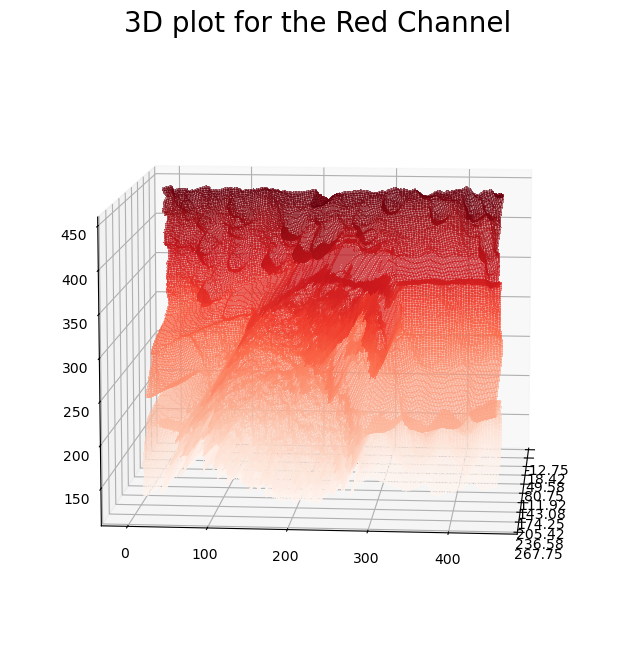

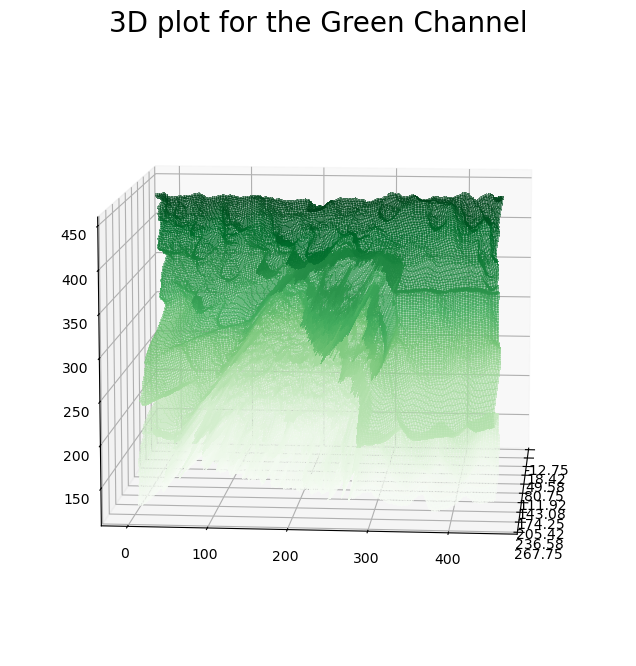

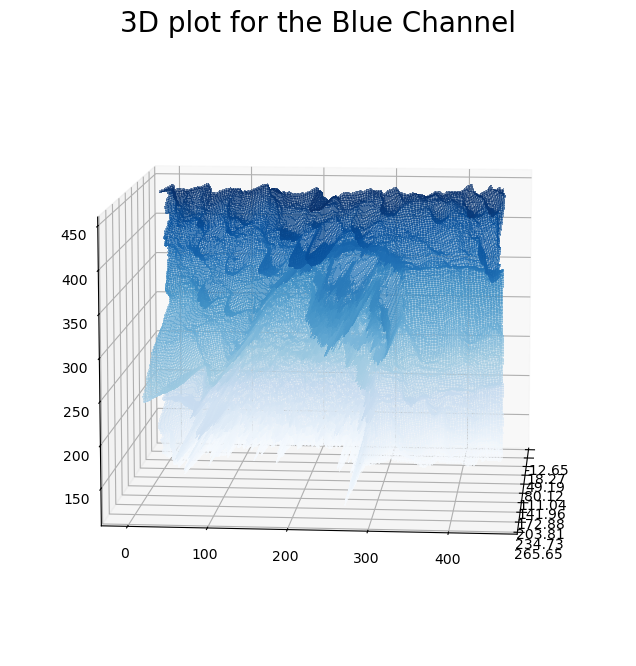

In [4]:
def plot_3d(X, Y, Z, cmap='Reds', title=''):

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cmap, linewidth=0, antialiased=False, rstride=2, cstride=2, alpha=0.5)
    ax.xaxis.set_major_locator(LinearLocator(10))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.view_init(elev=10., azim=5)
    ax.set_title(title, size=20)
    plt.show()
    
im = imread('../images/parrot.jpg')
Y = np.arange(im.shape[0])
X = np.arange(im.shape[1])
X, Y = np.meshgrid(X, Y)

Z1 = im[...,0]
Z2 = im[...,1]
Z3 = im[...,2]

# plot 3D visualizations of the R, G, B channels of the image respectively
plot_3d(Z1, X, im.shape[1]-Y, cmap='Reds', title='3D plot for the Red Channel')
plot_3d(Z2, X, im.shape[1]-Y, cmap='Greens', title='3D plot for the Green Channel')
plot_3d(Z3, X, im.shape[1]-Y, cmap='Blues', title='3D plot for the Blue Channel')

Image Projection with Homography with scikit-image

(220, 220, 3) (321, 450, 3)


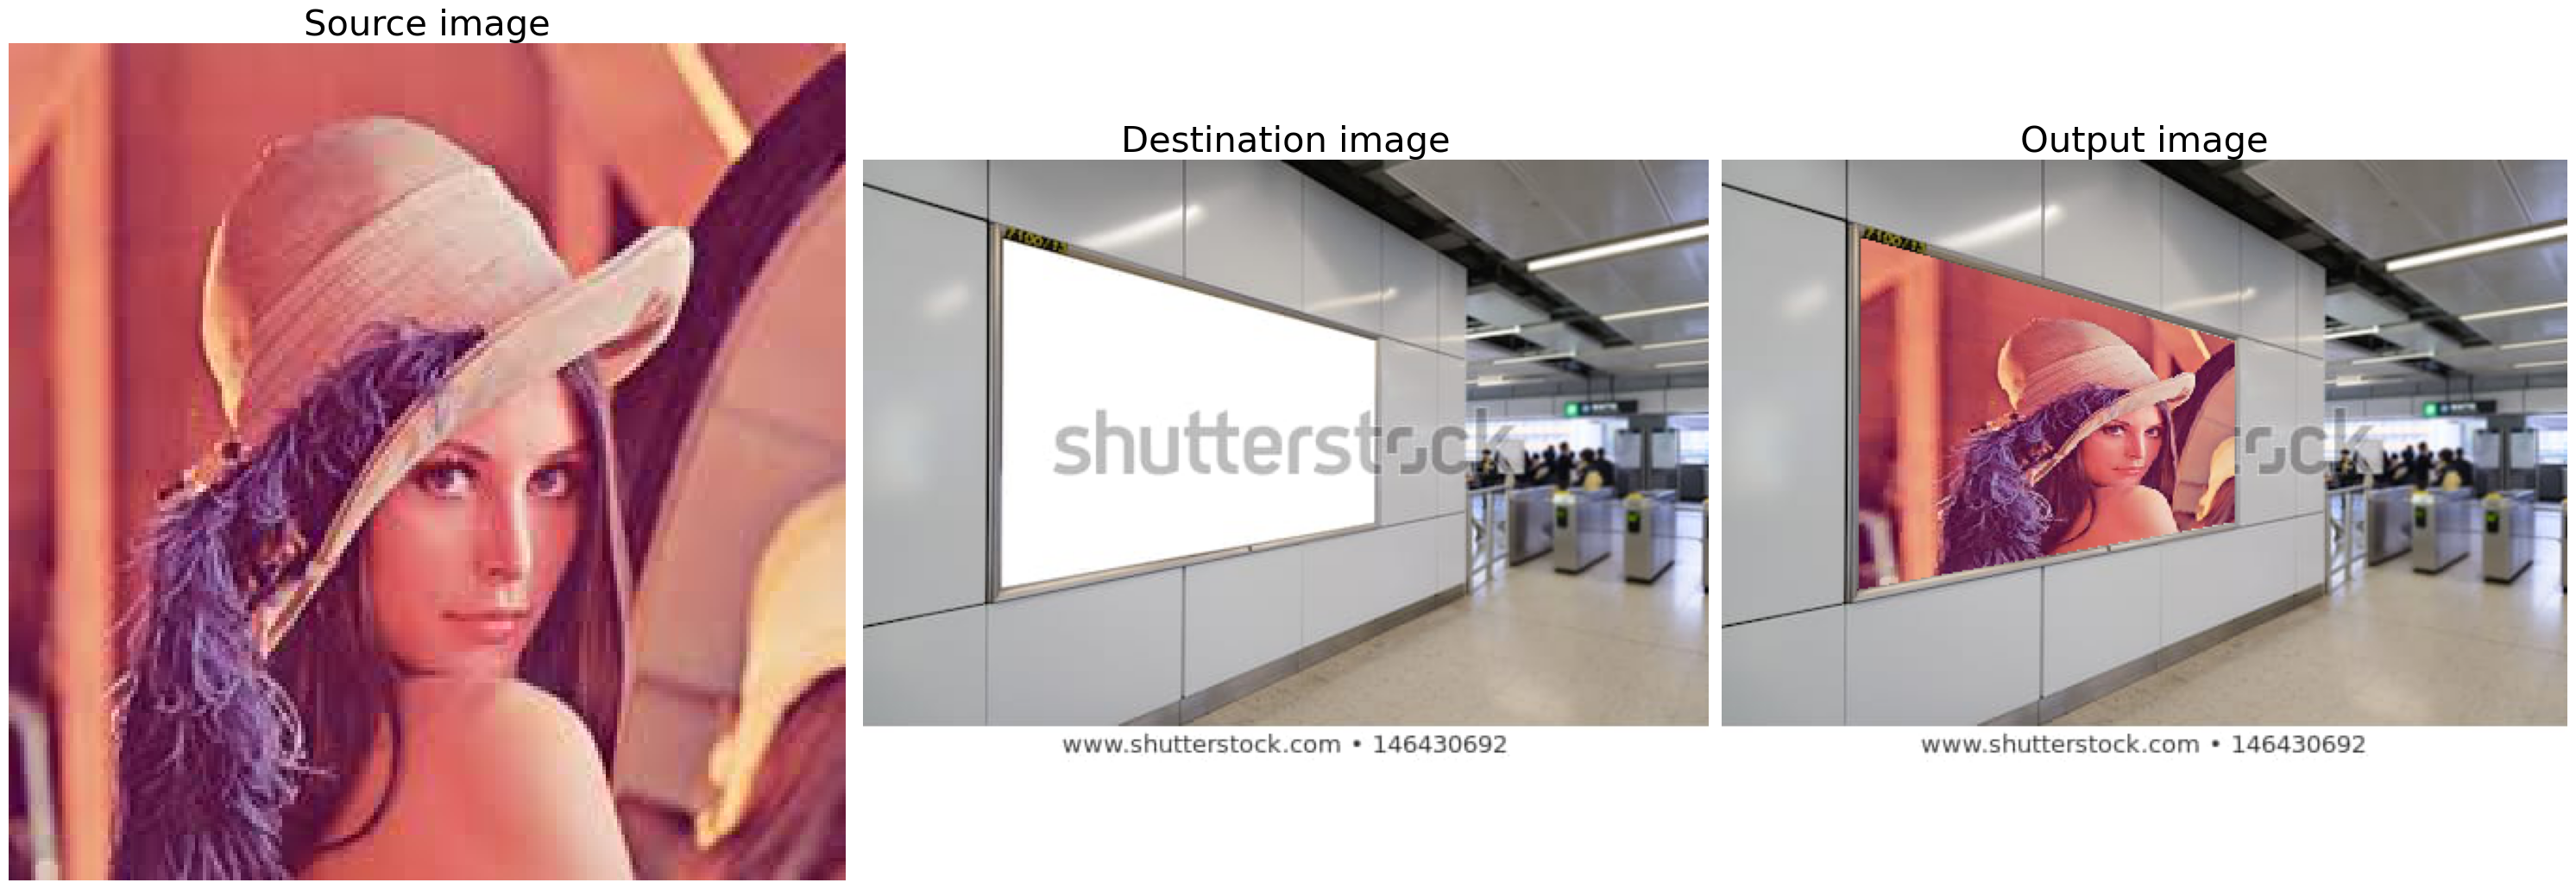

In [5]:
im_src = imread('../images/lena.jpg')
im_dst = imread('../images/shutterstock.jpg')
print(im_src.shape, im_dst.shape)

pt = ProjectiveTransform()
width_src, height_src = im_src.shape[0], im_src.shape[1]
src = np.array([[   0.,    0.],
       [height_src-1,    0.],
       [height_src-1,  width_src-1],
       [   0.,  width_src-1]])
dst = np.array([[ 74.,  41.],
       [ 272.,  96.],
       [ 272.,  192.],
       [ 72.,  228.]])

pt.estimate(src, dst)

width_dst, height_dst = im_dst.shape[0], im_dst.shape[1]

polygon = dst
poly_path=Path(polygon)

x, y = np.mgrid[:height_dst, :width_dst]
coors=np.hstack((x.reshape(-1, 1), y.reshape(-1,1))) 

mask = poly_path.contains_points(coors)
mask = mask.reshape(height_dst, width_dst)

dst_indices = np.array([list(x) for x in list(zip(*np.where(mask > 0)))])
src_indices = np.round(pt.inverse(dst_indices), 0).astype(int)
src_indices[:,0], src_indices[:,1] = src_indices[:,1], src_indices[:,0].copy()
im_out = np.copy(im_dst)
im_out[dst_indices[:,1], dst_indices[:,0]] = im_src[src_indices[:,0], src_indices[:,1]]
plt.figure(figsize=(30,10))
plt.subplot(131), plt.imshow(im_src, cmap='gray'), plt.axis('off'), plt.title('Source image', size=30)
plt.subplot(132), plt.imshow(im_dst, cmap='gray'), plt.axis('off'), plt.title('Destination image', size=30)
plt.subplot(133), plt.imshow(im_out, cmap='gray'), plt.axis('off'), plt.title('Output image', size=30)
plt.tight_layout()
plt.show()